#Lab 1: Introduction to ScikitLearn and Classification Tasks

During this Lab, we aim to achieve the following:


*   Familiarize with <a href="https://scikit-learn.org/stable/"> scikit-learn </a>, an essential python library in data science;
*   learn how to approach a classification task with scikit-learn.

In this notebook, we learn to use Scikit-Learn with a practical example and then, in the second part, we will test our knowledge by doing some exercises.



# Part 1: A Classification Example With Scikit-Learn

We start our lab by implementing *Logistic Regression* using  scikit-learn.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

[[-3.43951171e+00 -2.32450637e+00]
 [ 8.40012838e-01 -1.56835483e+01]
 [ 2.14171459e+00 -1.70676543e+00]
 [ 2.08860622e+00  6.04220116e-01]
 [-1.19662448e-01 -1.01437379e+01]
 [-4.03195246e+00 -1.12839408e+01]
 [-8.70614307e+00 -9.13765952e+00]
 [-2.65150012e+00 -2.78174031e+00]
 [ 1.54349947e+00  3.93598889e-01]
 [-1.50246120e-01 -5.33459208e+00]
 [-7.50308726e+00 -9.34039602e+00]
 [-6.97777845e+00 -4.20136213e+00]
 [-2.12847115e+00 -2.66048536e+00]
 [ 6.30577673e+00 -2.65842982e+00]
 [ 3.64552406e+00 -4.60917840e+00]
 [ 1.36262158e+00 -3.87637984e+00]
 [-6.93246233e-01 -3.79995367e-01]
 [-2.26702117e+00 -8.18881000e+00]
 [ 1.72964043e+00  2.23596082e-01]
 [-3.41080130e+00 -1.23145957e+01]
 [ 5.54521275e-01 -9.47031392e+00]
 [ 3.64931389e+00  5.14508583e-01]
 [ 2.38615495e-01 -9.09563763e+00]
 [ 4.44812509e+00 -1.64122377e-01]
 [ 2.55866646e+00 -2.31482673e+00]
 [ 1.37396168e+00  1.01377939e+00]
 [ 1.57754918e+00 -3.31328963e+00]
 [-4.63125575e+00 -4.64878984e+00]
 [-8.73639430e-01 -2

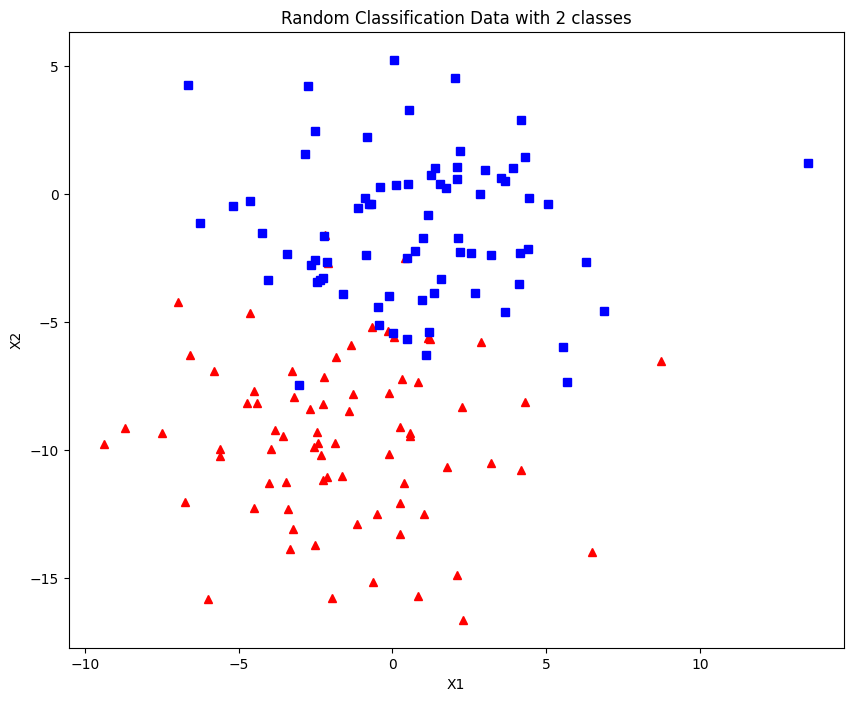

In [55]:
from collections import Counter

X_toy, y_toy = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=3.05,
                           random_state=2) # create an artificial dataset
print(X_toy)
print(y_toy)

print(Counter(y_toy))

#Plotting the data
fig = plt.figure(figsize=(10,8))
plt.plot(X_toy[:, 0][y_toy == 0], X_toy[:, 1][y_toy == 0], 'r^')
plt.plot(X_toy[:, 0][y_toy == 1], X_toy[:, 1][y_toy == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')
plt.show()


We can now define our classifier: logistic regression <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> [link] </a>.

In [56]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression() # options for the classifiers are passed as parameters to constructor of the class
                              # LogisticRegression(). Either visit the link or put the cursor over it to see them


Sklearn defines standard functions for models, like *fit* and *predict*.

In [57]:
#train phase
clf_lr.fit(X_toy, y_toy)


#estimation (y_hat)
y_pred_cl_lr = clf_lr.predict(X_toy)

print(y_pred_cl_lr)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


How to evaluate our models' performance? <br>
Scikit-learn offers a broad set of evaluation functions already implemented <a href = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics">[link]</a>.

In [58]:
from sklearn.metrics import accuracy_score

print(f"Logistic Regression -- Toy dataset.\tACC: {accuracy_score(y_toy, y_pred_cl_lr)}")


Logistic Regression -- Toy dataset.	ACC: 0.9333333333333333


In [59]:
# printing the values of the parameters after learning

print(clf_lr.coef_[0])


[0.25639935 0.9415584 ]


## Model Selection
When defining or training a model, we have the so called *hyperparameters*, i.e., different settings to configure for our training strategy.  <br>
The question is: *how can we decide the best configuration setting for the task?* <br>
The answer is the usage of *training* and *validation* partitions. <br>
We can use sklearn to do that: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_toy, y_toy,
                                                  train_size = 0.8, shuffle=False, random_state=42)

print(f"Original size = {X_toy.shape[0]}\tTrain size = {X_train.shape[0]}\tVal size = {X_val.shape[0]}")  # alternative way to use the print when there are
                                                                                                          # variables and text to print together


Original size = 150	Train size = 120	Val size = 30


First we use Scikit-Learn to train a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a> classifier with default parameters over the Toy dataset. <br>
We compute the accuracy on both training and validation sets.


In [61]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

#estimation (y_hat)
y_train_pred_lr = clf_lr.predict(X_train)
y_val_pred_lr = clf_lr.predict(X_val)

print(f"Logistic Regression.\tTrain ACC: {accuracy_score(y_train, y_train_pred_lr)}")
print(f"Logistic Regression.\tVal ACC: {accuracy_score(y_val, y_val_pred_lr)}")

Logistic Regression.	Train ACC: 0.9083333333333333
Logistic Regression.	Val ACC: 0.9333333333333333


### Model Selection with Logistic Regression

Logistic Regression has a hyperparameter *C*. Lower values of C correspond to simpler models (with the risk of underfitting), higher values of C correspond to complex models (with the risk of overfitting).  
Let's see how the performance change by varying it.

Let's find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10]$.

In [62]:
C = [0.001, 0.01, 0.1, 1., 10, 100]
for c in C:
    clf_lr = LogisticRegression(C = c)
    clf_lr.fit(X_train, y_train)

    #estimation (y_hat)
    y_train_pred_lr = clf_lr.predict(X_train)
    y_val_pred_lr = clf_lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc}\tVal Acc: {val_acc}")

LR. C= 0.001.	Train ACC: 0.9166666666666666	Val Acc: 0.9333333333333333
LR. C= 0.01.	Train ACC: 0.9166666666666666	Val Acc: 0.9333333333333333
LR. C= 0.1.	Train ACC: 0.9083333333333333	Val Acc: 0.9333333333333333
LR. C= 1.0.	Train ACC: 0.9083333333333333	Val Acc: 0.9333333333333333
LR. C= 10.	Train ACC: 0.9	Val Acc: 0.9333333333333333
LR. C= 100.	Train ACC: 0.9	Val Acc: 0.9333333333333333


### Exercise: Model Selection with Logistic Regression


We ask you again to work on a classification task. <br>
This time, the classification is more challenging.
The dataset is called *sonar*.

In [63]:
import pandas as pd
import random
random.seed(42)

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
ds = pd.read_csv(url, header = None)

# split into input and output elements
data = ds.values
random.shuffle(data)
X_sonar, y_sonar = data[:, :-1], data[:, -1]

print(X_sonar.shape, y_sonar.shape)


(208, 60) (208,)


It's time to partition our dataset. <br>
We ask you to create three partitions:


*   *train set* : a set of samples used to train a model.
*   *val set*: a set of samples used to decide the best model.
*   *test set*: a set of samples used to see our best model performance.

We now first split samples that we can use in our training (train and val), from samples that we cannot touch (test). <br>
**EX 1** Create a split between train_val and test, by maintaining the 25% of samples in the test set.

In [64]:
#
# Ex 1: complete here
#
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_sonar, y_sonar,
                                                      train_size = 0.75, shuffle=False, random_state=42)

**EX 1.2** From the train_val variables, split train and validation sets. Maintain the 10% of samples in the validation.


In [65]:
#
# Ex 1.2: complete here
#
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = 0.90, shuffle=False, random_state=42)

In [66]:
print(X_train.shape, X_val.shape, X_test.shape)

(140, 60) (16, 60) (52, 60)


**EX 2** Train and evaluate (using accuracy) a logistic regression with the default value for the hyperparameter. Do the evaluation **only** on the training and validation partitions.

In [67]:
#
# Ex 2: complete here
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression().fit(X_train, y_train)

y_train_pred_lr = clf.predict(X_train)
y_val_pred_lr = clf.predict(X_val)

print(f"Logistic Regression.\tTrain ACC: {accuracy_score(y_train, y_train_pred_lr)}")
print(f"Logistic Regression.\tVal ACC: {accuracy_score(y_val, y_val_pred_lr)}")

Logistic Regression.	Train ACC: 0.9428571428571428
Logistic Regression.	Val ACC: 0.8125


Let's find the best value for *C*, an hyperparameter of the model. <br>
See the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> [link] </a>. <br>
**EX 3**  We ask you to find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10, 100, 1000, 10000]$.

In [68]:
#
# Ex 3: complete here
#
C = [0.001, 0.01, 0.1, 1., 10, 100, 1000, 10000]
for c in C:
    clf_lr = LogisticRegression(C = c)
    clf_lr.fit(X_train, y_train)

    y_train_pred_lr = clf_lr.predict(X_train)
    y_val_pred_lr = clf_lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc}\tVal Acc: {val_acc}")

LR. C= 0.001.	Train ACC: 0.9428571428571428	Val Acc: 0.8125
LR. C= 0.01.	Train ACC: 0.9428571428571428	Val Acc: 0.8125
LR. C= 0.1.	Train ACC: 0.9428571428571428	Val Acc: 0.8125
LR. C= 1.0.	Train ACC: 0.9428571428571428	Val Acc: 0.8125
LR. C= 10.	Train ACC: 0.9571428571428572	Val Acc: 0.8125
LR. C= 100.	Train ACC: 0.9928571428571429	Val Acc: 0.875
LR. C= 1000.	Train ACC: 1.0	Val Acc: 0.9375
LR. C= 10000.	Train ACC: 1.0	Val Acc: 0.9375


**Ex 4** It's time to see the performance on the test set of the best model, after training it on the training set. Use the accuracy as evaluation metric.

In [69]:
#
# Ex 4: complete here
clf= LogisticRegression(C=1000).fit(X_train, y_train)

y_test_pred_lr = clf.predict(X_test)

print(f"Logistic Regression.\tVal ACC: {accuracy_score(y_test, y_test_pred_lr)}")

Logistic Regression.	Val ACC: 0.7115384615384616


## Computing Vectorial Representations

In [70]:
#!python -m spacy download "en_core_web_sm"
import spacy

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)

print(vectorizer.get_feature_names_out())
print("vocabulary size:", len(vectorizer.get_feature_names_out()))

# Let's see some of the options of CountVectorizer (first we change the tokenizer)
nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

def spacy_tokenizer(text):
  return [token.text for token in nlp_en(text)]

vectorizer2 = CountVectorizer(binary=False, tokenizer=spacy_tokenizer)
X=vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print("vocabulary size:", len(vectorizer2.get_feature_names_out()))

# now I can use X and Y in a learning algorithm


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
vocabulary size: 9
['.' '?' 'and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
vocabulary size: 11


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Sentiment Analysis

The dataset is described here: https://www.aclweb.org/anthology/P04-1035.pdf

It is part of nltk, so it is convenient for us to use.

The goal of this exercise is to build a first machine learning model using the tools that we have seen so far: choose how to preprocess the text, create a bag of words feature representation, train a model using an ML method of your choice.

You need to use the following split for the data:

*   test: 30% of the documents
*   The rest of the documents will be split as
    *   train: 75% of the documents
    *   validation: 30% of the documents


Use accuracy as evaluation measure.

In [72]:
import nltk
nltk.download('movie_reviews') # loads the dataset
nltk.download('punkt')
#!python -m spacy download "en_core_web_sm"


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the data
In the following I extract the raw content of the reviews (movie_reviews.raw()), i.e. each review is a string.
Another option is to use movie_reviews.words() that returns each review as a list of tokens. Feel free to use whichever best fit your needs.


In [73]:
from nltk.corpus import movie_reviews
import random
import spacy
from scipy.sparse import coo_matrix, vstack
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

documents = [(movie_reviews.raw(fileid), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

print("number of docs loaded:", len(documents))

corpus_raw = [ x[0] for x in documents ]
y_corpus = [ x[1] for x in documents ]
print(corpus_raw[0])
print(y_corpus[0])

random.seed(42)


number of docs loaded: 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an 

## Exercise

Create a vectorial representation of the data, then apply a learning algorithm by optimising the hyperparameters on the dev set. If you need to use any function that depends on random number generators, use 42 as seed.
Test several representations. You may try functions of the libraries we have seen in class or make your own vectorial representation from scratch.
Once you have selected the best hyperparameters and preprocessing, retrain your model on the union of the training and validation sets, then compute the accuracy on the test set.

Report your test performance on Moodle. In Moodle you are also supposed to upload the notebook in .py format (Menu File->Download->Download .py)
In the file with your code motivate any significant choice you made and all different preprocessing you attempted (clearly highlight the best one, though).

**Bonus Exercise** for your best model, print the 30 tokens whose corresponding parameter have highest absolute value. What do you think of this list? Does it make sense? Are all tokens expected?


In [74]:
X_train_val, X_test, y_train_val, y_test = train_test_split(corpus_raw, y_corpus,
                                                      train_size = 0.70, random_state=42) #Data need to be shuffled before the splitting due to the initial order

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = 0.75, random_state=42) #Data need to be shuffled before the splitting due to the initial order

In [76]:
nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

def spacy_tokenizer(text):
  return [token.text for token in nlp_en(text)]

vectorizer = CountVectorizer(binary=False, tokenizer=spacy_tokenizer)

In [77]:
X=vectorizer.fit_transform(X_train)
X_vect_val=vectorizer.transform(X_val)
print(vectorizer.get_feature_names_out())
print("vocabulary size:", len(vectorizer.get_feature_names_out()))

['\x05' '\n' '\n ' ... 'zycie' 'zzzzzzz' '|']
vocabulary size: 30850


In [78]:
C = [0.001, 0.01, 0.1, 1., 10, 100, 1000, 10000]  #I chose 1 instead of 1000 because a c too high can lead to some problems
for c in C:
    clf_lr = LogisticRegression(C = c, max_iter=10000)
    clf_lr.fit(X, y_train)

    y_train_pred_lr = clf_lr.predict(X)
    y_val_pred_lr = clf_lr.predict(X_vect_val)

    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc}\tVal Acc: {val_acc}")

LR. C= 0.001.	Train ACC: 0.88	Val Acc: 0.7542857142857143
LR. C= 0.01.	Train ACC: 0.9904761904761905	Val Acc: 0.8171428571428572
LR. C= 0.1.	Train ACC: 1.0	Val Acc: 0.8257142857142857
LR. C= 1.0.	Train ACC: 1.0	Val Acc: 0.8371428571428572
LR. C= 10.	Train ACC: 1.0	Val Acc: 0.8257142857142857
LR. C= 100.	Train ACC: 1.0	Val Acc: 0.8285714285714286
LR. C= 1000.	Train ACC: 1.0	Val Acc: 0.84
LR. C= 10000.	Train ACC: 1.0	Val Acc: 0.8342857142857143


In [79]:
#Checking if there exists a c that fits better with a telescopic search
C = [ 0.7, 0.8, 0.9, 1, 1.1, 1.2]
for c in C:
    clf_lr = LogisticRegression(C = c, max_iter=10000)
    clf_lr.fit(X, y_train)

    y_train_pred_lr = clf_lr.predict(X)
    y_val_pred_lr = clf_lr.predict(X_vect_val)

    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc}\tVal Acc: {val_acc}")

LR. C= 0.7.	Train ACC: 1.0	Val Acc: 0.8371428571428572
LR. C= 0.8.	Train ACC: 1.0	Val Acc: 0.8371428571428572
LR. C= 0.9.	Train ACC: 1.0	Val Acc: 0.8314285714285714
LR. C= 1.	Train ACC: 1.0	Val Acc: 0.8371428571428572
LR. C= 1.1.	Train ACC: 1.0	Val Acc: 0.8371428571428572
LR. C= 1.2.	Train ACC: 1.0	Val Acc: 0.8371428571428572


In [80]:
X_union= X_train + X_val
y_union= y_train + y_val

vectorizer = CountVectorizer(binary=False, tokenizer=spacy_tokenizer)
X=vectorizer.fit_transform(X_union)
X_test_vect=vectorizer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [83]:
clf_lr = LogisticRegression(C = 1, max_iter=10000) # 1 is the best c possible, max_iter is set to 10000 to permit the full training of the LR
clf_lr.fit(X, y_union)

y_train_pred_lr = clf_lr.predict(X)
y_test_pred_lr = clf_lr.predict(X_test_vect)

tr_acc = accuracy_score(y_union, y_train_pred_lr)
test_acc= accuracy_score(y_test, y_test_pred_lr)

print(f"Train ACC: {tr_acc}\tTest Acc: {test_acc}")

Train ACC: 1.0	Test Acc: 0.8166666666666667


In [98]:
values = clf_lr.coef_.flatten()
token_idx = np.argsort(np.abs(values))[-30:]

token_names = vectorizer.get_feature_names_out()
top_30 = [(token_names[idx], values[idx]) for idx in token_idx]

# After extracting all the tokens and the respective weights i divide them into positive and negative ones
top_pos=[]
top_neg=[]
for token, weight in sorted(top_30, key=lambda x: -abs(x[1])):
    if weight>0:
      top_pos.append((token,float(weight)))
    else:
      top_neg.append((token,float(weight)))

print(f"Top positive tokens and weights")
for el in top_pos:
  print(f"Token: {el[0]}\tWeight: {el[1]}")

print("")
print(f"Top negative tokens and weights")
for el in top_neg:
  print(f"Token: {el[0]}\tWeight: {el[1]}")

Top positive tokens and weights
Token: fun	Weight: 0.39268324670495874
Token: great	Weight: 0.39128639955060723
Token: seen	Weight: 0.38479860068355387
Token: true	Weight: 0.3729567645097
Token: see	Weight: 0.36988284472099703
Token: well	Weight: 0.36583462977844555
Token: people	Weight: 0.35813525022668313
Token: perfectly	Weight: 0.33220063717201287
Token: excellent	Weight: 0.3306668989912194
Token: takes	Weight: 0.3076842677688615
Token: sometimes	Weight: 0.29844018721564747
Token: entertaining	Weight: 0.2976048501840471

Top negative tokens and weights
Token: bad	Weight: -0.7950804598943202
Token: plot	Weight: -0.511092150814648
Token: worst	Weight: -0.45325183221639254
Token: unfortunately	Weight: -0.4531858786672655
Token: nothing	Weight: -0.44898482106304854
Token: only	Weight: -0.3974031249142984
Token: boring	Weight: -0.3861497958264048
Token: any	Weight: -0.37009195130469996
Token: looks	Weight: -0.36510703061775557
Token: humor	Weight: -0.3266834929036702
Token: script	Weigh

In [ ]:
# The list makes sense because most of the words inside are important in establishing the sentiment of a text.
# In the list there are more negative terms than the positive ones.
# There are a few tokens is this list thar are strange, like "3", but I assume that this number is correlated with the review in the number of stars and other parts of the text similar.